In [1]:
import numpy as np
from utils import tokenize, build_vocabulary, get_word_to_id_from_vocab, get_id_to_word, build_corpus, create_cooccurrence_matrix

In [2]:
text = "prince loved princess form the bottom of his heart!"

In [3]:
words = tokenize(text)
print(words)

['prince', 'loved', 'princess', 'form', 'the', 'bottom', 'of', 'his', 'heart', '!']


In [4]:
vocab = build_vocabulary(words)
print(vocab)

{'heart', 'of', 'the', 'bottom', 'form', 'his', 'princess', '!', 'loved', 'prince'}


In [5]:
word_to_id = get_word_to_id_from_vocab(list(vocab))
print(word_to_id)

{'heart': 0, 'of': 1, 'the': 2, 'bottom': 3, 'form': 4, 'his': 5, 'princess': 6, '!': 7, 'loved': 8, 'prince': 9}


In [6]:
id_to_word=get_id_to_word(word_to_id)
print(id_to_word)

{0: 'heart', 1: 'of', 2: 'the', 3: 'bottom', 4: 'form', 5: 'his', 6: 'princess', 7: '!', 8: 'loved', 9: 'prince'}


In [7]:
corpus=build_corpus(words,word_to_id)
print(corpus)

[9, 8, 6, 4, 2, 3, 1, 5, 0, 7]


In [8]:
C = create_cooccurrence_matrix(corpus,window_size=1,vocab_size=len(vocab))
print(C)

[[0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [9]:
from utils import build_ppmi

In [10]:
ppmi = build_ppmi(C)

PPMI building: 100%|██████████| 100/100 [00:00<00:00, 100102.72it/s]


In [11]:
ppmi.shape

(10, 10)

In [12]:
U, S, V = np.linalg.svd(ppmi)

In [13]:
U.shape

(10, 10)

In [14]:
S

array([4.373458 , 4.373458 , 4.139099 , 4.139099 , 3.3719957, 3.3719957,
       2.2007084, 2.2007084, 0.7642788, 0.7642788], dtype=float32)

In [15]:
word_reps = U[:,:2]

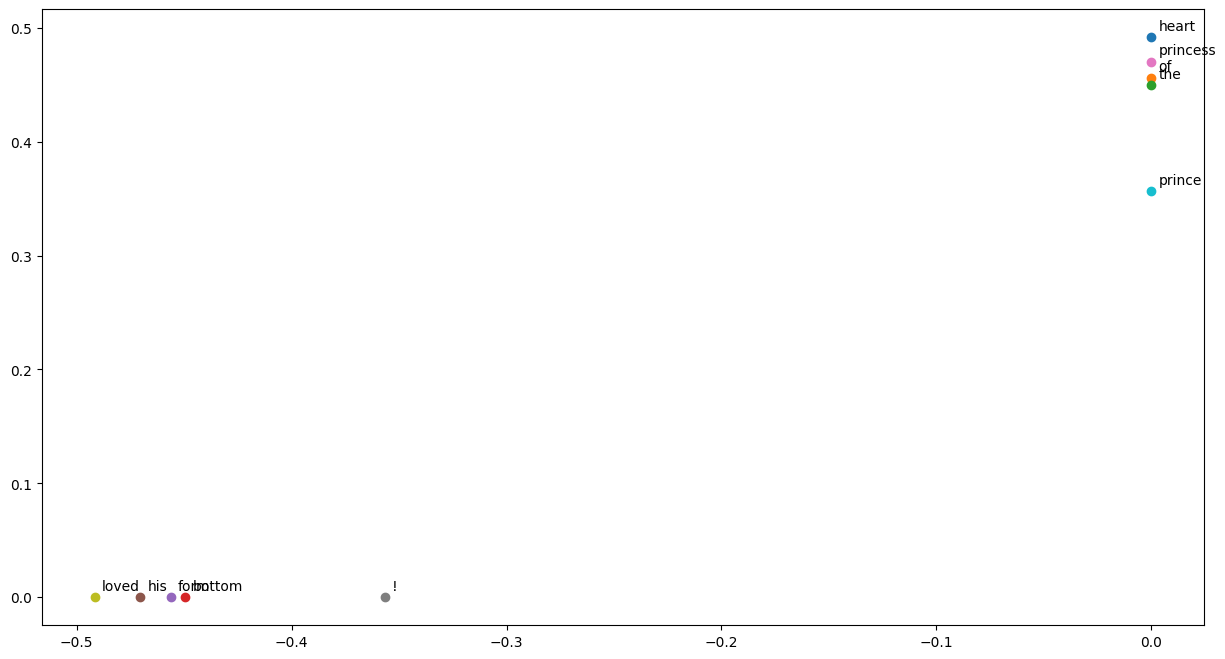

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
for i, (x, y) in enumerate(word_reps):
    plt.scatter(x, y)  # Plot the point
    plt.annotate(id_to_word[i], # The label for this point
                 (x, y),  # The position to place the text
                 textcoords="offset points",  # How to position the text
                 xytext=(5,5),  # Distance from text to points (x,y)
                 ha='left')  # Horizontal alignment can be left, right or center

plt.show()